# Topological Machine Learning

## Solving a classification problem using Topological Data Analysis

### Introduction

A classification problem involves the task of **assigning a label** to an **input** based on its features. 

They key concepts of a classification problem are:

- Input data: data used for classification. 
- Output labels (classes)
- Model: set of algorithms and structures used to map the input data to the labels. 

In a machine learning context the goal is to **learn a mapping** or decision boundary from the input data to the corresponding output labels. In order to be able to test that our model is working properly, we will need to separate the data into training and testing set.

- Training set: the model is trained on a labeled dataset, meaning that each instance in the training set has a known class label.
- Testing set: used for evaluation, the model guesses the labels of the testing set and we can compare them to the true known labels. 

In this notebook, we will tackle the problem of classification using a model purely based on topological data analysis, more precisely, based on the concept of silhouettes.

To understand this notebook, a basic course of topological data analysis is supposed, and thus all concepts regarding its computations are not explained. There are two supporting files:
- *clasSilfier.py* is a python class containing all the code for the TDA model classifier.
- *utils.py* is a python file containing just one function, the one dedicated to computing the decision boundary of a model.

### Getting started

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import gudhi as gd
import gudhi.representations as gdr
import seaborn as sns
from classilfier import clasSILfier
from utils import draw_decision_surface

We will try our classifier with a toy dataset. For that, we use the "datasets" function from sklearn to get a small dataset made out of two gaussian blobs. Our goal is to train and use a classifier, so we will start by dividing the dataset into training set and testing set. 

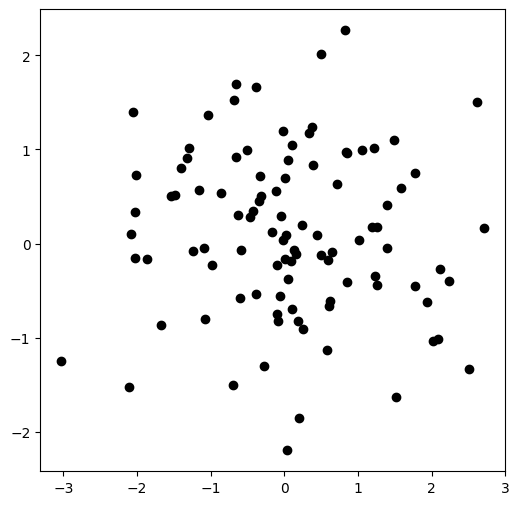

In [2]:
np.random.seed(seed=43)

#Make a dataset out of two gaussian blobs
X,y = datasets.make_gaussian_quantiles(n_classes=2, n_samples=120)

X_train = X[:100]
y_train = y[:100]

X_test = X[100:]
y_test = y[100:]

plt.figure(figsize=(6, 6))
for i in range(1, len(X_train)):
    plt.plot(X_train[i][0], X_train[i][1], color='black', marker='o')
plt.show()

In this case, the label of a point corresponds to which of the two gaussians is the point from.

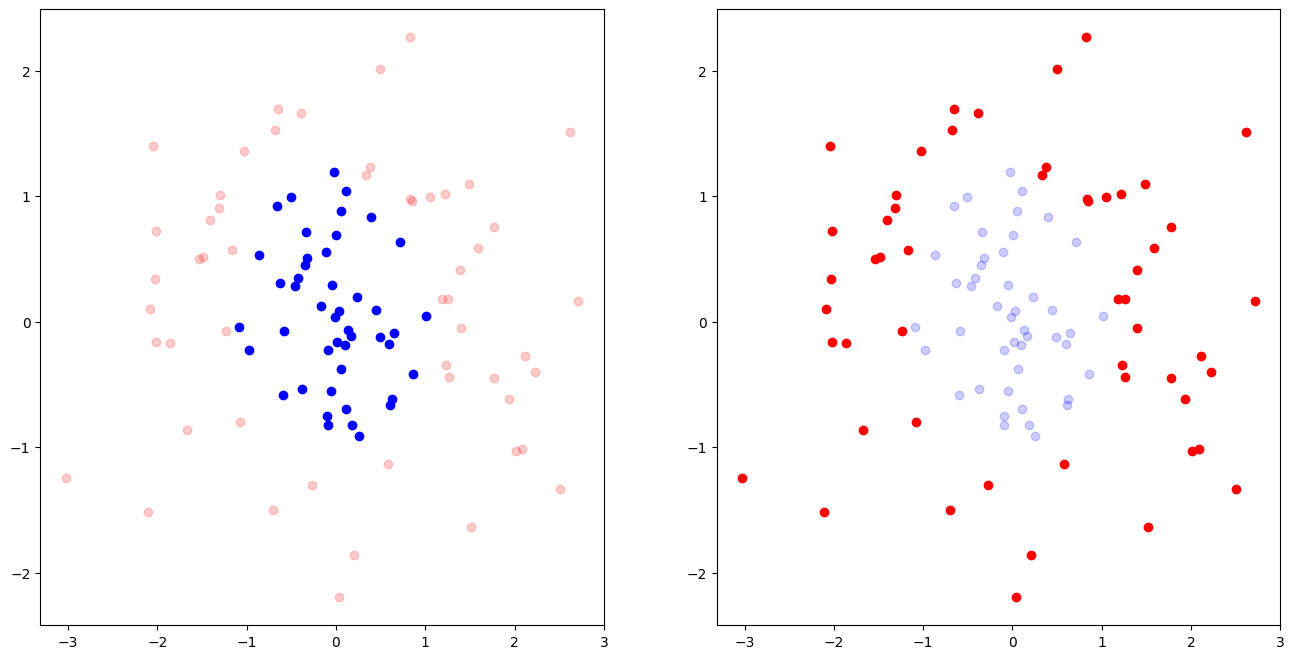

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
color = 'blue'
for i in range(1, len(X_train)):
    if y_train[i] == 1:
        color='red'
        alpha = 0.2
    if y_train[i] == 0:
        color='blue'
        alpha=1
    ax1.plot(X_train[i][0], X_train[i][1], color=color, marker='o', alpha=alpha)
    
color = 'blue'
for i in range(1, len(X_train)):
    if y_train[i] == 1:
        color='red'
        alpha = 1
    if y_train[i] == 0:
        color='blue'
        alpha=0.2
    ax2.plot(X_train[i][0], X_train[i][1], color=color, marker='o', alpha=alpha)
plt.show()

The first step is training the classifier, i.e., fitting it to the training data. In our case, the training step is very simple, as it only involves computing the silhouettes for each of our classes. 

In [4]:
classifier = clasSILfier()
classifier.fit(X_train, y_train)

Let us see how the training silhouettes look!

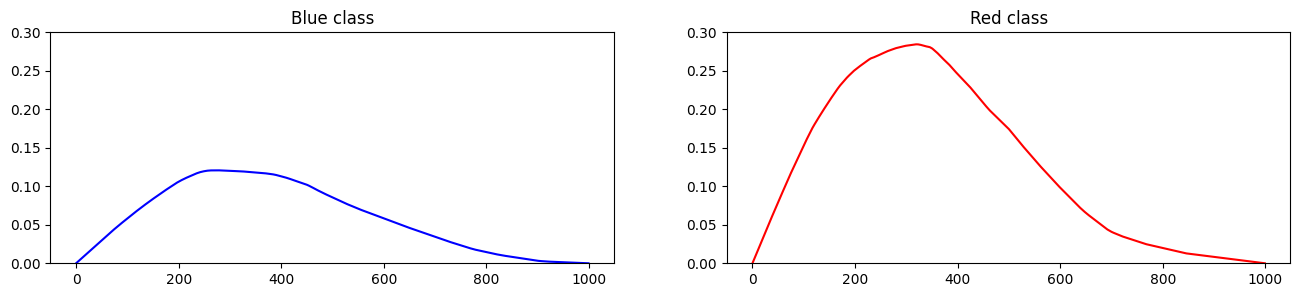

In [5]:
silhouettes = classifier.get_trained_silhouettes()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 3))
ax1.plot(silhouettes[0], '-', color='blue')
ax1.set_ylim(0, 0.30)
ax1.title.set_text("Blue class")
ax2.plot(silhouettes[1], '-', color='red')
ax2.set_ylim(0, 0.30)
ax2.title.set_text("Red class")
plt.show()

Before testing the classifier, let us understand how it works. The process is as follows:
1. Given one input test, add it to both classes in parallel. 

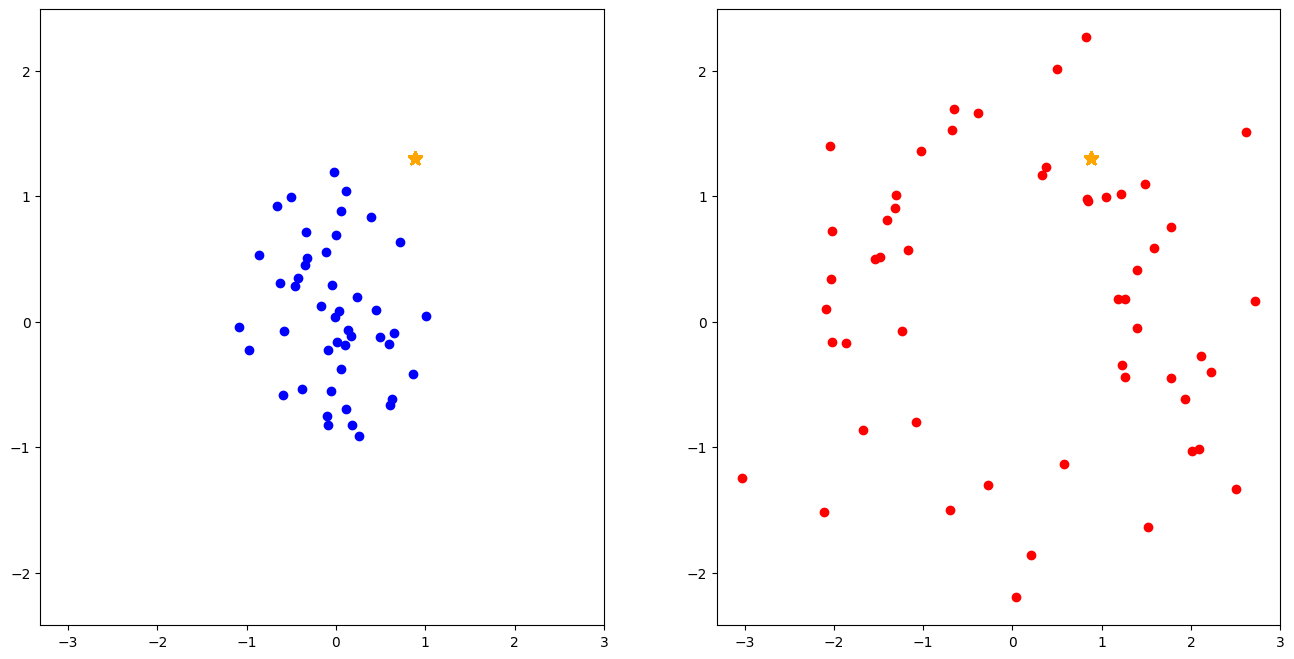

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
color = 'blue'
for i in range(1, len(X_train)):
    if y_train[i] == 1:
        color='red'
        alpha = 0
    if y_train[i] == 0:
        color='blue'
        alpha=1
    ax1.plot(X_train[i][0], X_train[i][1], color=color, marker='o', alpha=alpha)
    ax1.plot(X_test[0][0], X_test[0][1], color='orange', marker='*', alpha=1, markersize=10)
    
color = 'blue'
for i in range(1, len(X_train)):
    if y_train[i] == 1:
        color='red'
        alpha = 1
    if y_train[i] == 0:
        color='blue'
        alpha=0
    ax2.plot(X_train[i][0], X_train[i][1], color=color, marker='o', alpha=alpha)
    ax2.plot(X_test[0][0], X_test[0][1], color='orange', marker='*', alpha=1, markersize=10)
plt.show()

2. Recompute the silhouette for each of the classes in parallel. Compute the euclidean distance between the newly obtained silhouettes and the training ones. 

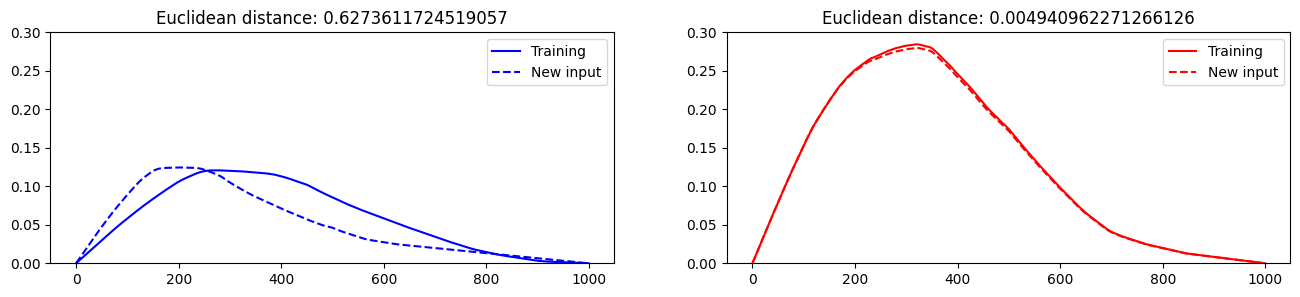

In [7]:
new, distances = classifier.get_new_silhouettes(X_test[0])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 3))
ax1.plot(silhouettes[0], '-', color='blue')
ax1.plot(new[0], '--', color='blue')
ax1.set_ylim(0, 0.30)
ax1.legend(['Training', 'New input'])
ax1.title.set_text('Euclidean distance: ' + str(distances[0]))

ax2.plot(silhouettes[1], '-', color='red')
ax2.plot(new[1], '--', color='red')
ax2.set_ylim(0, 0.30)
ax2.title.set_text('Euclidean distance: '+str(distances[1]))
ax2.legend(['Training', 'New input'])
plt.show()

3. Assign to the testing point the class whose silhouette was closer to the corresponding training silhouette.

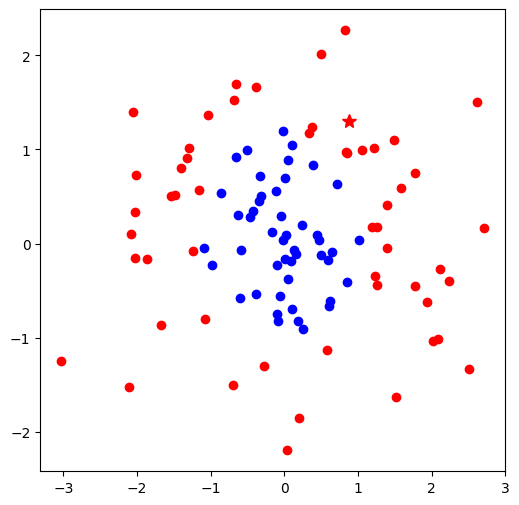

In [8]:
plt.figure(figsize=(6, 6))
color = 'blue'
for i in range(len(X_train)):
    if y_train[i] == 1:
        color='red'
        alpha = 1
    if y_train[i] == 0:
        color='blue'
        alpha=1
    plt.plot(X_train[i][0], X_train[i][1], color=color, marker='o', alpha=alpha)
plt.plot(X_test[0][0], X_test[0][1], marker='*', color='red', markersize=10)
plt.show()  

Now we can put it all together and do all the testing process at once!

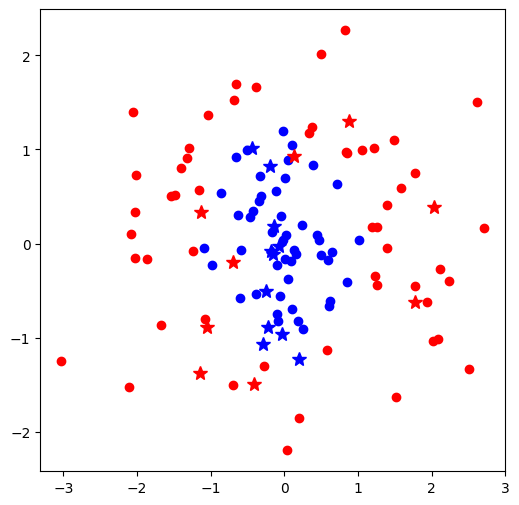

In [9]:
y_hat = classifier.predict(X_test)

plt.figure(figsize=(6, 6))
color = 'blue'
for i in range(len(X_train)):
    if y[i] == 1:
        color='red'
        alpha = 1
    if y[i] == 0:
        color='blue'
        alpha=1
    plt.plot(X_train[i][0], X_train[i][1], color=color, marker='o', alpha=alpha)
    
for i in range(len(X_test)):
    if y_hat[i] == 1:
        color='red'
        alpha = 1
    if y_hat[i] == 0:
        color='blue'
        alpha=1
    plt.plot(X_test[i][0], X_test[i][1], color=color, marker='*', alpha=alpha, markersize=10)
plt.show()

Is it a good classifier? Is it a bad one? Let's compute some basic metrics to see how it performed.

Most classifiers are evaluated by their score in accuracy.
$$ \text{Accuracy} = \frac{\text{# correctly classified inputs}}{\text{# total inputs}} $$ 

We can also look at the decision boundary: a line or surface that separates different regions in data space.

Classifier accuracy:  0.8


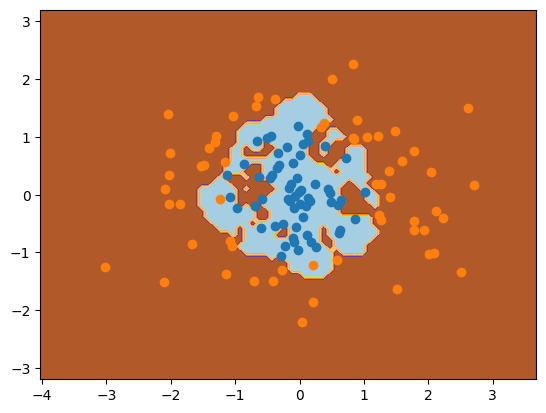

In [10]:
print("Classifier accuracy: ", sum(y_hat == y_test)/len(y_test))
draw_decision_surface(X, y, classifier, [0, 1])